# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Remove predictors with p-values too high and refit the model
* Examine and interpret the model results
* Split data into training and testing sets
* Fit a regression model to the data set using statsmodel library


## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)" then you need to further preprocess your column names.**

In [1]:
#Your code here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [3]:
list(df.columns)

['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10+',
 'ages_10-14',
 'ages_10-16',
 'ages_10-21',
 'ages_11-16',
 'ages_12+',
 'ages_12-16',
 'ages_14+',
 'ages_16+',
 'ages_1½-3',
 'ages_1½-5',
 'ages_2-5',
 'ages_4+',
 'ages_4-7',
 'ages_4-99',
 'ages_5+',
 'ages_5-12',
 'ages_5-8',
 'ages_6+',
 'ages_6-12',
 'ages_6-14',
 'ages_7+',
 'ages_7-12',
 'ages_7-14',
 'ages_8+',
 'ages_8-12',
 'ages_8-14',
 'ages_9+',
 'ages_9-12',
 'ages_9-14',
 'ages_9-16',
 'theme_name_Angry Birds™',
 'theme_name_Architecture',
 'theme_name_BOOST',
 "theme_name_Blue's Helicopter Pursuit",
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus Gyrosphere Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator 3-in-1',
 'theme_name_Creator Expert',
 'theme_name_DC Comics™ Super Heroes',
 'theme_name_DC Super Hero Girls',
 'theme_name_DIMENSIONS™',
 'theme_name_DUPLO®',
 'theme_name_Dilophosaurus Outpost Attack',
 'theme_name_Disn

In [4]:
#Your code here - Manipulate column names
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),('+','plus'), ('½','half'), ('-','_')]

def format_col(col):
    for old, new in subs:
        col = col.replace(old, new)
    return col

In [5]:
new_cols = [format_col(col) for col in df.columns]
df.columns = new_cols
list(df.columns)

['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10plus',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12plus',
 'ages_12_16',
 'ages_14plus',
 'ages_16plus',
 'ages_1half_3',
 'ages_1half_5',
 'ages_2_5',
 'ages_4plus',
 'ages_4_7',
 'ages_4_99',
 'ages_5plus',
 'ages_5_12',
 'ages_5_8',
 'ages_6plus',
 'ages_6_12',
 'ages_6_14',
 'ages_7plus',
 'ages_7_12',
 'ages_7_14',
 'ages_8plus',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_Angry_Birds',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_3_in_1',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DC_Super_Hero_Girls',
 'theme_name_DIMENSIONS',
 'theme_name_DUPLO',
 'theme_name_Dilophosaurus_Out

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10870 entries, 0 to 10869
Columns: 103 entries, piece_count to review_difficulty_unknown
dtypes: float64(6), int64(97)
memory usage: 8.5 MB


In [7]:
#Your code here - Define the target and predictors
target = 'list_price'
x_cols = list(df.columns)
x_cols.remove(target)

In [8]:
train, test = train_test_split(df)

In [9]:
print(len(train), len(test))
train.head()

8152 2718


,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
4872,-0.161134,65.8800,0.578962,-3.792112,-5.641909,-3.905839,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2692,-0.605066,28.0722,-0.370585,1.087407,0.990651,-1.491638,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4005,-0.233318,36.5878,-0.258873,0.041796,0.368848,0.761617,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
930,-0.560552,30.3924,-0.286801,0.216064,0.161581,0.117830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6702,0.551081,97.9860,1.863642,-1.178084,-0.045687,-0.043117,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [10]:
test.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
6875,-0.502805,27.9860,-0.119234,0.041796,-0.045687,0.278777,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6933,0.635296,134.1878,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10827,-0.330767,36.5878,-0.314729,0.041796,-0.252954,-0.043117,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6548,2.259435,181.9860,2.757332,0.216064,0.368848,-0.043117,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4542,-0.359640,21.6000,-0.203018,0.216064,0.576116,0.117830,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
#Your code here - Fit the actual model
predictors = '+'.join(x_cols)
formula = target + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     530.7
Date:                Sat, 28 Sep 2019   Prob (F-statistic):               0.00
Time:                        16:23:52   Log-Likelihood:                -40496.
No. Observations:                8152   AIC:                         8.118e+04
Df Residuals:                    8057   BIC:                         8.185e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.0749      1.751     36.029      0.000      59.643      66.507
piece_count                                         77.6988      0.899     86.435      0.000      75.937      79.461
num_reviews                                          6.3272      0.697      9.081      0.000       4.961       7.693
play_star_rating                                     5.3124      0.627      8.472      0.000       4.083       6.542
star_rating                                         -1.4812      0.720     -2.058      0.040      -2.892      -0.070
val_star_rating                                     -8.4905      0.651    -13.047      0.000      -9.766      -7.215
ages_10plus                                        130.8390      6.575     19.901      0.000     117.951     143.727
ages_10_14                                         -21.7673      8.870     -2.454      0.014     -39.155      -4.379
ages_10_16                                         -11.4365      3.940     -2.903      0.004     -19.160      -3.713
ages_10_21                                          44.3573      7.421      5.977      0.000      29.810      58.904
ages_11_16                                         -20.5514      5.740     -3.580      0.000     -31.803      -9.299
ages_12plus                                         68.6871      5.610     12.243      0.000      57.689      79.685
ages_12_16                                         -56.7972      6.866     -8.272      0.000     -70.257     -43.337
ages_14plus                                         22.6146      4.139      5.463      0.000      14.500      30.729
ages_16plus                                         26.3288      5.978      4.404      0.000      14.610      38.048
ages_1half_3                                        -8.3992      2.356     -3.566      0.000     -13.017      -3.781
ages_1half_5                                        -4.3644      2.870     -1.521      0.128      -9.990       1.261
ages_2_5                                            15.9112      1.652      9.633      0.000      12.673      19.149
ages_4plus                                         -16.5619      6.894     -2.402      0.016     -30.077      -3.047
ages_4_7                                            -5.6514      3.235     -1.747      0.081     -11.993       0.690
ages_4_99                                           -3.7338      3.861     -0.967      0.334     -11.302       3.834
ages_5plus                                          -9.1082      3.084     -2.954      0.003     -15.153      -3.064
ages_5_12                                          -33.5331      3.122    -10.742      0.000     -39.652     -27.414
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [12]:
#Your code here - Remove features which do not appear to be statistically relevant
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')

In [13]:
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

103 74
['piece_count', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,63.0749,1.751,36.029,0.00,59.643,66.507
piece_count,77.6988,0.899,86.435,0.00,75.937,79.461
num_reviews,6.3272,0.697,9.081,0.00,4.961,7.693
play_star_rating,5.3124,0.627,8.472,0.00,4.083,6.542
star_rating,-1.4812,0.720,-2.058,0.04,-2.892,-0.070


In [14]:
#Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = target + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     683.7
Date:                Sat, 28 Sep 2019   Prob (F-statistic):               0.00
Time:                        16:23:52   Log-Likelihood:                -40503.
No. Observations:                8152   AIC:                         8.115e+04
Df Residuals:                    8078   BIC:                         8.167e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.2886      1.646     38.453      0.000      60.062      66.515
piece_count                                         77.7994      0.877     88.673      0.000      76.080      79.519
num_reviews                                          6.3241      0.682      9.270      0.000       4.987       7.661
play_star_rating                                     5.4360      0.612      8.881      0.000       4.236       6.636
star_rating                                         -1.3828      0.704     -1.965      0.049      -2.762      -0.004
val_star_rating                                     -8.5305      0.618    -13.813      0.000      -9.741      -7.320
ages_10plus                                        130.9339      4.782     27.379      0.000     121.560     140.308
ages_10_14                                         -17.6839      9.223     -1.917      0.055     -35.764       0.396
ages_10_16                                          -7.8207      3.804     -2.056      0.040     -15.278      -0.363
ages_10_21                                          43.6560      3.369     12.960      0.000      37.053      50.259
ages_11_16                                         -17.2764      5.582     -3.095      0.002     -28.219      -6.334
ages_12plus                                         71.0732      6.129     11.596      0.000      59.059      83.088
ages_12_16                                         -53.0167      7.231     -7.332      0.000     -67.191     -38.842
ages_14plus                                         26.3344      4.803      5.483      0.000      16.920      35.749
ages_16plus                                         29.4438      6.685      4.405      0.000      16.340      42.547
ages_1half_3                                        -1.4290      3.049     -0.469      0.639      -7.406       4.548
ages_2_5                                            22.4275      1.967     11.399      0.000      18.571      26.284
ages_4plus                                         -13.3211     10.524     -1.266      0.206     -33.952       7.309
ages_5plus                                          -7.9356      3.041     -2.610      0.009     -13.897      -1.975
ages_5_12                                          -28.5198      2.692    -10.594      0.000     -33.797     -23.242
ages_6plus                                         -22.2292      5.547     -4.007      0.000     -33.103     -11.356
ages_6_12                                          -16.4299      1.890     -8.694      0.000     -20.134     -12.725
ages_7_12                                          -15.6094      2.209     -7.065      0.000     -19.940     -11.278
ages_7_14                                

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [15]:
#Your code here - Continue to refine the model
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')

In [16]:
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

75 64
['piece_count', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,63.2886,1.646,38.453,0.000,60.062,66.515
piece_count,77.7994,0.877,88.673,0.000,76.080,79.519
num_reviews,6.3241,0.682,9.270,0.000,4.987,7.661
play_star_rating,5.4360,0.612,8.881,0.000,4.236,6.636
star_rating,-1.3828,0.704,-1.965,0.049,-2.762,-0.004


## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extend of this problem.

In [17]:
#Your code here - Code a way to identify multicollinearity
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('piece_count', 4.509469020252813),
 ('num_reviews', 2.494145542100061),
 ('play_star_rating', 2.41199132722329),
 ('star_rating', 3.1789788815630167),
 ('val_star_rating', 2.3815156232602535),
 ('ages_10plus', 7.136513213535577),
 ('ages_10_16', 1.1688916155525482),
 ('ages_10_21', 1.0594929600993903),
 ('ages_11_16', 1.1623089561498925),
 ('ages_12plus', 6.2261478372901005),
 ('ages_12_16', 1.1703013758786944),
 ('ages_14plus', 1.8892883033700805),
 ('ages_16plus', 9.362693711036206),
 ('ages_2_5', 1.2183252642626814),
 ('ages_5plus', inf),
 ('ages_5_12', 3.177620975368911),
 ('ages_6plus', 2.66570209902076),
 ('ages_6_12', 1.8380251079186118),
 ('ages_7_12', 1.4921023607768162),
 ('ages_7_14', 1.7441381090718449),
 ('ages_8plus', 2.582960859409979),
 ('ages_8_12', 1.2859339515658055),
 ('ages_8_14', 1.8563873814935565),
 ('ages_9plus', 1.4088182979555635),
 ('ages_9_12', 1.0217688352671668),
 ('ages_9_14', 1.8354166315761018),
 ('theme_name_Architecture', 5.2349558681251205),
 ('th

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [18]:
#Your code here - Subset features based on multicollinearity
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

64 57


In [19]:
predictors = '+'.join(x_cols)
formula = target + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     773.8
Date:                Sat, 28 Sep 2019   Prob (F-statistic):               0.00
Time:                        16:23:56   Log-Likelihood:                -40940.
No. Observations:                8152   AIC:                         8.200e+04
Df Residuals:                    8094   BIC:                         8.240e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           67.8143      1.175     57.708      0.000      65.511      70.118
piece_count                                         79.6597      0.704    113.174      0.000      78.280      81.039
num_reviews                                          3.8390      0.628      6.110      0.000       2.607       5.071
play_star_rating                                     6.9015      0.553     12.478      0.000       5.817       7.986
star_rating                                         -2.5311      0.712     -3.556      0.000      -3.926      -1.136
val_star_rating                                     -9.7619      0.643    -15.171      0.000     -11.023      -8.501
ages_10_16                                         -13.7775      3.650     -3.775      0.000     -20.933      -6.622
ages_10_21                                          40.3327      3.434     11.745      0.000      33.601      47.064
ages_11_16                                         -27.9437      5.458     -5.120      0.000     -38.642     -17.245
ages_12_16                                         -61.4692      7.045     -8.725      0.000     -75.280     -47.658
ages_14plus                                         11.0754      3.767      2.940      0.003       3.692      18.459
ages_2_5                                            19.9045      1.850     10.757      0.000      16.277      23.532
ages_5_12                                          -30.8153      2.677    -11.513      0.000     -36.062     -25.568
ages_6plus                                         -24.5531      5.735     -4.281      0.000     -35.796     -13.311
ages_6_12                                          -20.3853      1.677    -12.159      0.000     -23.672     -17.099
ages_7_12                                          -19.3931      2.075     -9.344      0.000     -23.461     -15.325
ages_7_14                                          -14.0210      1.754     -7.992      0.000     -17.460     -10.582
ages_8plus                                           2.4695      4.463      0.553      0.580      -6.279      11.218
ages_8_12                                          -19.8960      2.664     -7.468      0.000     -25.118     -14.674
ages_8_14                                          -15.7604      1.832     -8.601      0.000     -19.352     -12.169
ages_9plus                                          18.5240     10.033      1.846      0.065      -1.143      38.191
ages_9_12                                          -31.2809      6.108     -5.122      0.000     -43.253     -19.308
ages_9_14                                          -14.6697      2.536     -5.784      0.000     -19.641      -9.698
theme_name_BOOST                         

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

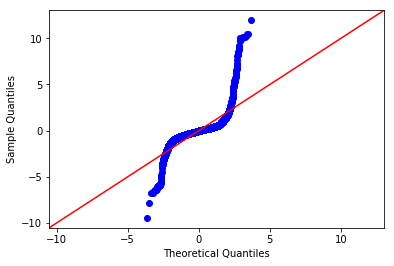

In [20]:
# Your code here - Check that the residuals are normally distributed
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

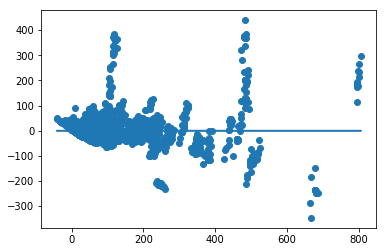

In [21]:
#Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confiding the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least 2 additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

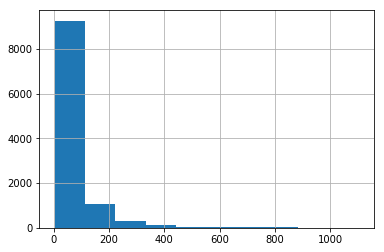

In [22]:
#Your code here - Check for outliers
df.list_price.hist()

In [23]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df['list_price'].quantile(q=q)))

0.8 percentile: 90.986
0.81 percentile: 92.66216100000052
0.82 percentile: 97.5878
0.83 percentile: 101.898
0.84 percentile: 109.13971199999885
0.85 percentile: 110.352
0.86 percentile: 119.96492
0.87 percentile: 121.9878
0.88 percentile: 121.9878
0.89 percentile: 134.18779999999998
0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878


In [24]:
#Your code here - Rerun the model with extreme outliers removed
orig_tot = len(df)
df = df[df['list_price'] < 450]
print('% removed:', (orig_tot - len(df))/orig_tot)

df.list_price = df.list_price.map(np.log) #Applying a log transformation
train, test = train_test_split(df)

% removed: 0.010487580496780129


In [25]:
predictors = '+'.join(x_cols)
formula = target + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     454.2
Date:                Sat, 28 Sep 2019   Prob (F-statistic):               0.00
Time:                        16:23:57   Log-Likelihood:                -4821.8
No. Observations:                8067   AIC:                             9760.
Df Residuals:                    8009   BIC:                         1.017e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.3528      0.014    231.511      0.000       3.324       3.381
piece_count                                          0.6013      0.010     61.074      0.000       0.582       0.621
num_reviews                                         -0.0174      0.008     -2.276      0.023      -0.032      -0.002
play_star_rating                                     0.1147      0.007     16.908      0.000       0.101       0.128
star_rating                                         -0.0512      0.008     -6.058      0.000      -0.068      -0.035
val_star_rating                                     -0.1223      0.008    -16.261      0.000      -0.137      -0.108
ages_10_16                                           0.6819      0.045     15.086      0.000       0.593       0.770
ages_10_21                                           0.7260      0.039     18.727      0.000       0.650       0.802
ages_11_16                                           0.3931      0.063      6.193      0.000       0.269       0.517
ages_12_16                                           0.1100      0.080      1.383      0.167      -0.046       0.266
ages_14plus                                          0.5919      0.047     12.707      0.000       0.501       0.683
ages_2_5                                             0.5329      0.022     23.865      0.000       0.489       0.577
ages_5_12                                           -0.6649      0.032    -20.727      0.000      -0.728      -0.602
ages_6plus                                          -0.8710      0.069    -12.657      0.000      -1.006      -0.736
ages_6_12                                           -0.0849      0.020     -4.286      0.000      -0.124      -0.046
ages_7_12                                            0.1660      0.025      6.703      0.000       0.117       0.214
ages_7_14                                            0.0989      0.021      4.735      0.000       0.058       0.140
ages_8plus                                           0.6074      0.054     11.150      0.000       0.501       0.714
ages_8_12                                            0.3340      0.031     10.652      0.000       0.273       0.395
ages_8_14                                            0.4356      0.023     19.273      0.000       0.391       0.480
ages_9plus                                           0.1721      0.116      1.483      0.138      -0.055       0.400
ages_9_12                                            0.4544      0.081      5.631      0.000       0.296       0.613
ages_9_14                                            0.6031      0.031     19.175      0.000       0.541       0.665
theme_name_BOOST                         

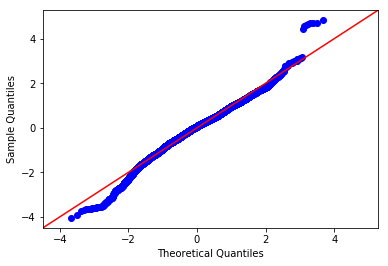

In [26]:
#Your code here - Check normality and homoscedasticity assumptions
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

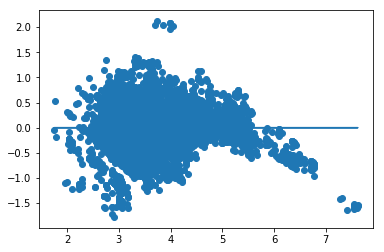

In [27]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [28]:
x_cols = ['piece_count', 'country_US']

predictors = '+'.join(x_cols)
formula = target + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     4478.
Date:                Sat, 28 Sep 2019   Prob (F-statistic):               0.00
Time:                        16:23:57   Log-Likelihood:                -7628.6
No. Observations:                8067   AIC:                         1.526e+04
Df Residuals:                    8064   BIC:                         1.528e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.7303      0.007    519.243      0.000       3.716       3.744
piece_count     0.7288      0.008     93.887      0.000       0.714       0.744
country_US     -0.2697      0.028     -9.687      0.000      -0.324      -0.215
==============================================================================
Omnibus:                      383.461   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              517.566
Skew:                          -0.465   Prob(JB):                    4.09e-113
Kurtosis:                       3.821   Cond. No.                         4.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

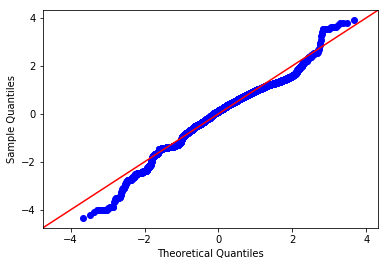

In [29]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

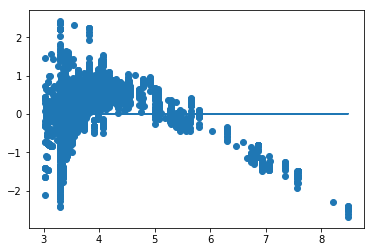

In [30]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches and make ongoing refinements. These choices depend on the context and specific use cases. 